# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5,1,'Relationship between CRIM and Price')

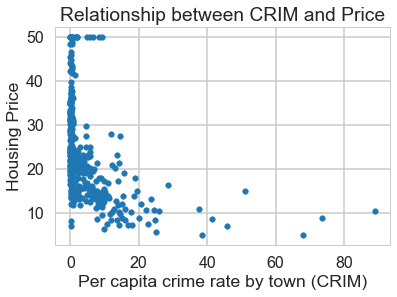

In [25]:
plt.scatter(bos.CRIM, bos.PRICE, marker='.')
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>

In [21]:
# your turn: describe relationship
np.corrcoef(bos['CRIM'].values, bos['PRICE'].values)


array([[ 1.        , -0.38583169],
       [-0.38583169,  1.        ]])

In general the relationship is negative (i.e., negative corrcoef) and linear (e.g., correlation coefficient of -0.385) indicating the crime rate goes down with increasing housing price.
But a huge chunk of data concentrated near 0 per capita crime rate is insensitive to the relationship. Also some instances with very high price (near unit 50) shows a range in crime rate from 0 - 10 per capita. It suggests that the linear correlation between crime rate and the house price is not strong.

<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>


[[1.         0.69535995]
 [0.69535995 1.        ]]


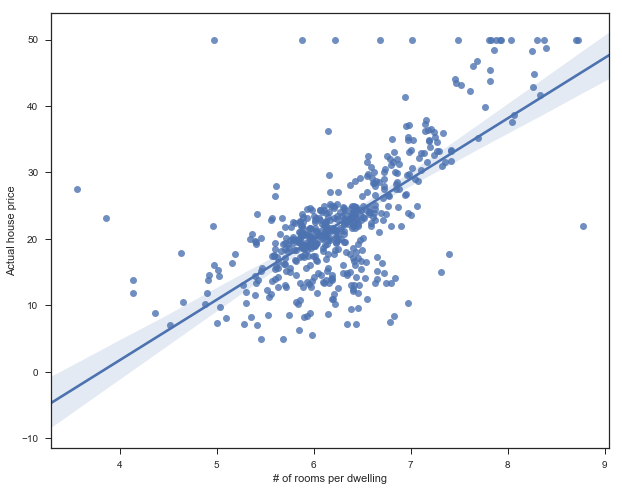

In [321]:
# your turn: scatter plot between *RM* and *PRICE*
print(np.corrcoef(bos['RM'].values, bos['PRICE'].values))
ax = sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)
ax.set(xlabel='# of rooms per dwelling', ylabel='Actual house price')
plt.show()

### Discussion
The price and number of rooms have a clear positive linear relationship. The price goes up with increased number of rooms, which seems quite logical. The correlation coefficient also is high, ~0.7. Ofcourse there are some instances which have high price despite relatively less number of rooms. Those housing units maight have other advantages aside the number of rooms.

[[ 1.         -0.50778669]
 [-0.50778669  1.        ]]


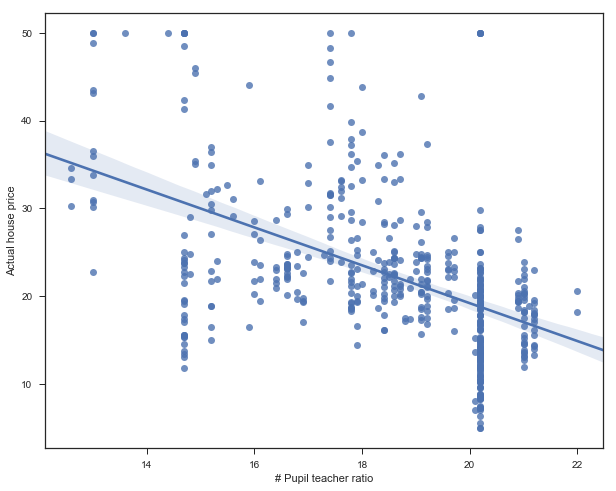

In [322]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
print(np.corrcoef(bos['PTRATIO'].values, bos['PRICE'].values))
ax = sns.regplot(y="PRICE", x="PTRATIO", data=bos, fit_reg = True)
ax.set(xlabel='# Pupil teacher ratio', ylabel='Actual house price')
plt.show()

### Discussion
Pupil teacher ratio does not clearly show any strong relation with price. But a closer look shows there is a weak negative correlation between this two. This seems reasonable as house price in good school district is usually high, and low pupil - teacher ratio often indicate a better school system and vice versa.

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>


In [339]:
# your turn: create some other scatter plots
# finding imporatnt features
bos_corr = bos.corr()
price_corr = bos_corr['PRICE']
price_corr.sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.385832
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
PRICE      1.000000
Name: PRICE, dtype: float64

### Discussion
The correlation coefficient with price indicates some features have positive relations while others are negatively related. Overall, % lower status population (LSTAT), pupil to teacher ratio (PTRATIO), and average number of rooms per dwelling (RM) are highly correlated. It shows that RM has a positive correlation coeff 0.695, while LSTAT and PTRATIO have negative correlation of -0.737 and -0.5 respectively. Below 0.5 does not suggest significant correlation. So, we will consider LSTAT as another predictor and look into its scatter plot with PRICE now.

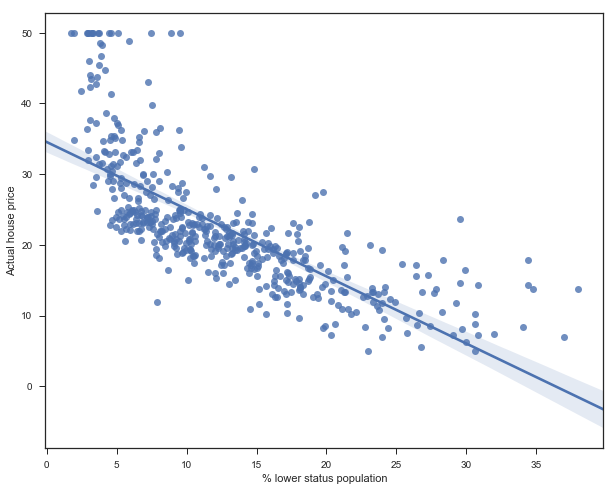

In [343]:
ax = sns.regplot(y="PRICE", x="LSTAT", data=bos, fit_reg = True)
ax.set(xlabel='% lower status population', ylabel='Actual house price')
plt.show()

### Discussion
From the plot it is evident that the housing price and %lower status of population has a negative correlation: lower price where the % lower status population is high. This indicates that in a poor neighbourhood the house price is likely to be low. 

### Some other observations


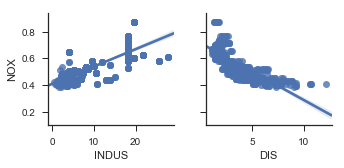

In [62]:
sns.pairplot(bos, x_vars=["INDUS", "DIS"], y_vars=["NOX"], kind="reg")

### Discussion
The nitric oxide concentration (NOX) has a positive correlation with proportion of non-retail business acres per town or INDUS, higher proportion of INDUS causing higher amount of NOX.
Weighted distances to five Boston employment centres or DIS and NOX have negative correlation. Higher distance from employment center can be related to less traffic and less NOX at that area.


### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

In [ ]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


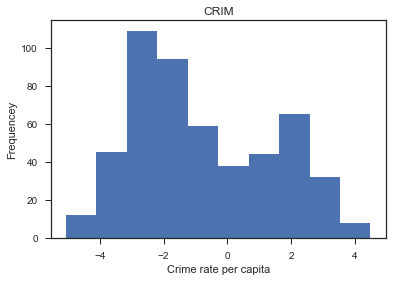

In [66]:
plt.hist(np.log(bos.CRIM))
#plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?


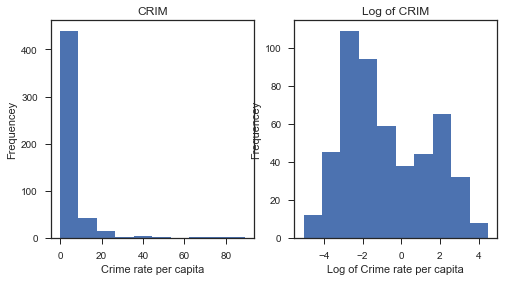

In [356]:
#your turn
# histogram without log transformation of Crime rate per capita
fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax1 = axes.flatten()
ax0.hist(bos.CRIM)
ax0.set_title("CRIM")
ax0.set_xlabel("Crime rate per capita")
ax0.set_ylabel("Frequencey")

# histogram with log transformation of CRIM
ax1.hist(np.log(bos.CRIM))
ax1.set_title("Log of CRIM")
ax1.set_xlabel("Log of Crime rate per capita")
ax1.set_ylabel("Frequencey")

plt.rcParams["figure.figsize"] = [8,4]
plt.show()

### Answer
There are more CRIM values concentrated between 0 - 10. With the binning without log it was not obvious how they are really distributed within that span. With log transformation it is clear that more instances are within 0.001 to 0.1 which was not clear without this transformation.

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

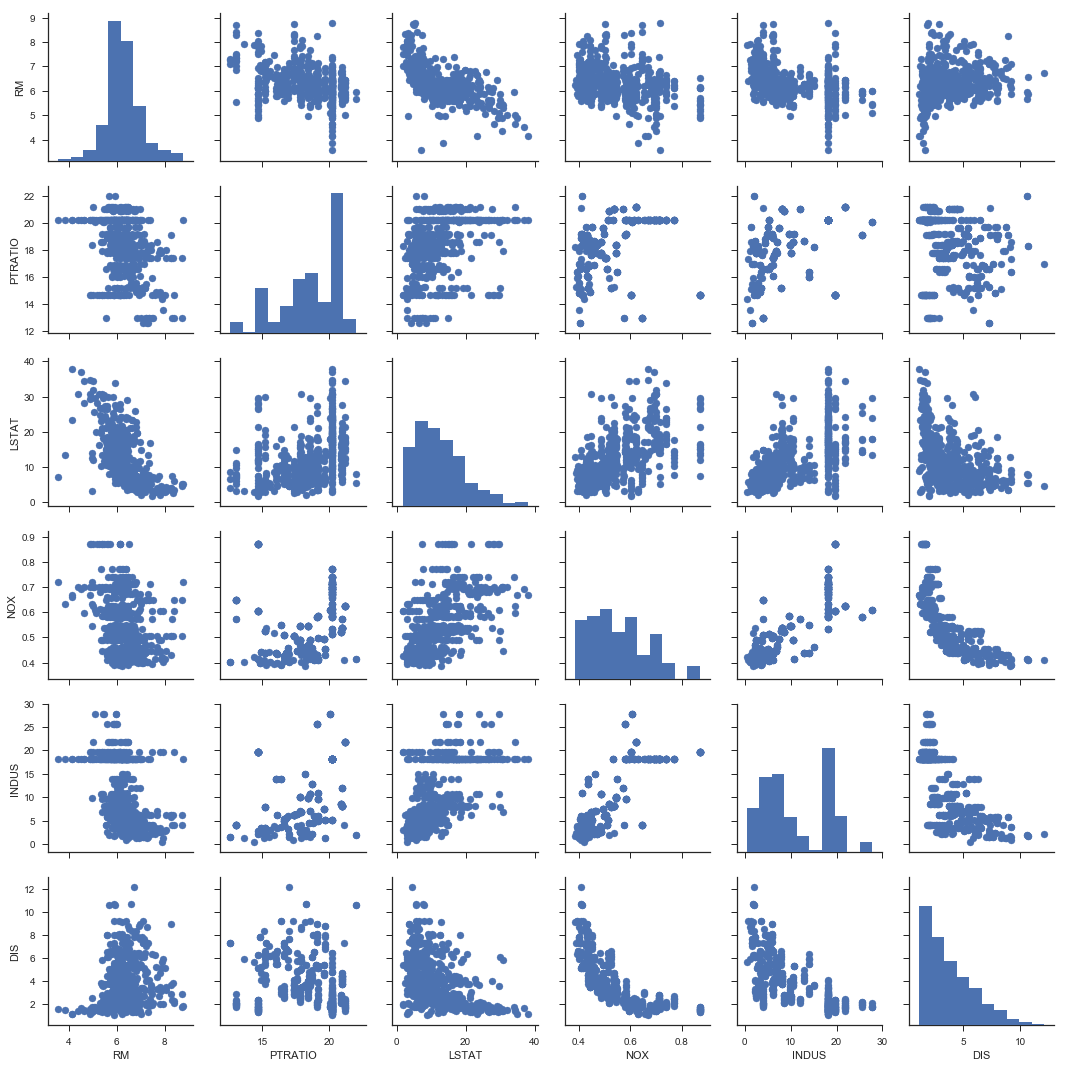

In [359]:
# plotting histogram and scatterplots for important features:RM, PTRATIO, LSTAT, NOX, INDUS, DIS 
bos_sel = pd.concat([bos.RM, bos.PTRATIO, bos.LSTAT, bos.NOX, bos.INDUS, bos.DIS], axis=1)
g = sns.PairGrid(bos_sel)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [360]:
bos_sel.corr()

,RM,PTRATIO,LSTAT,NOX,INDUS,DIS
RM,1.000000,-0.355501,-0.613808,-0.302188,-0.391676,0.205246
PTRATIO,-0.355501,1.000000,0.374044,0.188933,0.383248,-0.232471
LSTAT,-0.613808,0.374044,1.000000,0.590879,0.603800,-0.496996
NOX,-0.302188,0.188933,0.590879,1.000000,0.763651,-0.769230
INDUS,-0.391676,0.383248,0.603800,0.763651,1.000000,-0.708027
DIS,0.205246,-0.232471,-0.496996,-0.769230,-0.708027,1.000000


### Discussion
Correlation among predictors: RM has strong negative correlation with LSTAT. PTRATIO does not hold strong correlation with any other features, LSTAT has strong correlation with RM (-ve), NOX, and INDUS. NOX has strong correlation with LSTAT, INDUS and DIS (-ve). INDUS has strong correlation with LSTAT, NOX and DIS (-ve). DIS has strong correlation with NOX (-ve) and INDUS (-ve).

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [84]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\manas\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [85]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           2.49e-74
Time:                        18:06:24   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

minimum fitted price is: -2.2580106944554785 maximum fitted price is: 45.24589607832456
minimum house price is: 5.0 maximum house price is: 50.0
minimum number of room: 3.561


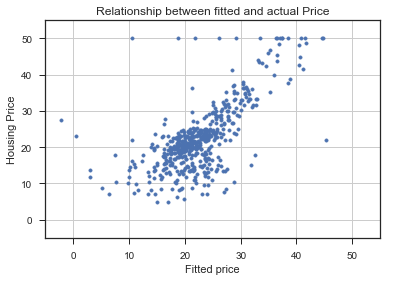

In [104]:
# your turn
print('minimum fitted price is:', min(m.fittedvalues), 'maximum fitted price is:', max(m.fittedvalues))
print('minimum house price is:', min(bos.PRICE), 'maximum house price is:', max(bos.PRICE))
print('minimum number of room:', min(bos.RM))
plt.scatter(m.fittedvalues, bos.PRICE, marker='.')
plt.xlabel("Fitted price")
plt.ylabel("Housing Price")
plt.title("Relationship between fitted and actual Price")
plt.xlim(-5, 55)
plt.ylim(-5, 55)
plt.grid(True)
plt.show()


### Discussion
From the scatterplot it is evident that the fitted value is slightly underestimating the actual price. The minimum value of the fitted house prize is -ve (corresponding to minimum number of room as 3.56), which is not pracitcal. Couple of actual price can be seen on grid line along 50, while the corresponding fitted price vary from 10 to 45. The scatter plot of actual housing price and RM also had those instances where the price was insensitive to the RM variable.

### Fitting Linear Regression using `sklearn`


In [367]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [ ]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [368]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

In [369]:
# your turn
print('the r^2 with intercept:', lm.score(X, bos.PRICE))
print('coefficients with intercept:', lm.coef_) 
print('intercept:', lm.intercept_)

the r^2 with intercept: 0.7406077428649428
coefficients with intercept: [-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]
intercept: 36.491103280363404


In [371]:
# fitting with intercept = 0
lmf = LinearRegression(fit_intercept=False)
lmf.fit(X, bos.PRICE)
print('the r^2 with 0 intercept:', lmf.score(X, bos.PRICE))
print('coef with 0 intercept:', lmf.coef_) 
print('intercept:', lmf.intercept_)

the r^2 with 0 intercept: 0.7136639021041447
coef with 0 intercept: [-9.16297843e-02  4.86751203e-02 -3.77930006e-03  2.85636751e+00
 -2.88077933e+00  5.92521432e+00 -7.22447929e-03 -9.67995240e-01
  1.70443393e-01 -9.38925373e-03 -3.92425680e-01  1.49832102e-02
 -4.16972624e-01]
intercept: 0.0


### Answer
We can pass the fit through the origin by selecting fit_intercept=False while instantiating the regressor. 

The intercept will be '0' when the average price is 0 with all predictor set to 0. It seems logical that even when some feature units are '0', there would be true intercept (+ve or -ve)some variables, such as INDUS, NOX, AGE, DIS, RAD, LSTAT etc. I would recommend to select intercept as 'True' while fitting the model.

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>


### Answer
The residuals should be normally distributed for a linear model assumption. Because the normal distribution implies that there is no bias in the distribution, so the residuals are independent and identical. The randomness in the scatterplot and the normality in the frequency distribution of residuals suggest that the dataset is fit for linear regression.

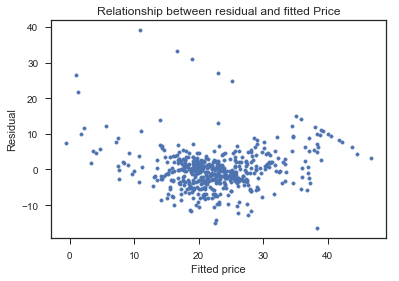

In [240]:
# calculating residuals, res
res = bos.PRICE - lmf.predict(X)
plt.scatter(lmf.predict(X), res, marker='.')
plt.xlabel("Fitted price")
plt.ylabel("Residual")
plt.title("Relationship between residual and fitted Price")
plt.show()


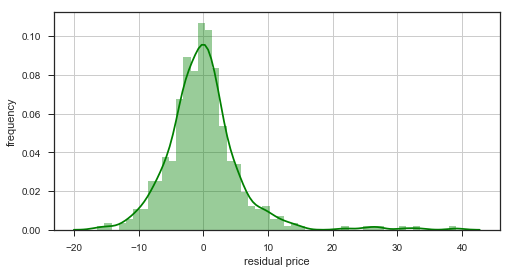

In [376]:
ax = sns.distplot(res, bins=50, color="g")
ax.set_xlabel('residual price')
ax.set_ylabel('frequency')
ax.grid(True)
plt.show()

### Discussion
Although there is a heavy rightward tail of the redisual distribution, it is approximately normal.

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


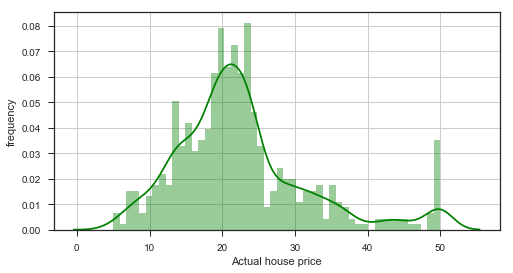

In [382]:
ax = sns.distplot(bos.PRICE, bins=50, color="g")
ax.set_xlabel('Actual house price')
ax.set_ylabel('frequency')
ax.grid(True)
plt.show()

In [383]:
print(bos.PRICE.describe())

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64


### Answer
FALSE. Y is the house price which is dependent on many other variables. The distribution is not normal as we can see below but it can be used for linear regression model. The key parameter for being eligible in linear regression modeling is the normal distrubution of the residual, not the Y itself.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [139]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.491103280363404


In [140]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [141]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [142]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>


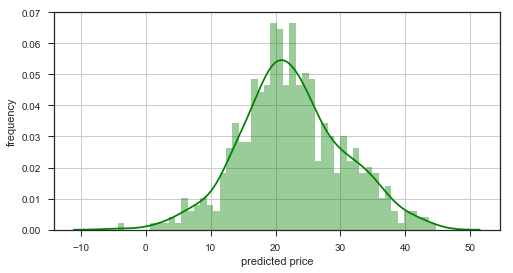

In [379]:
# your turn
pred_price = lm.predict(X)
ax = sns.distplot(pred_price, bins=50, color="g")
ax.set_xlabel('predicted price')
ax.set_ylabel('frequency')
ax.grid(True)
plt.show()

In [147]:
pd.DataFrame(pred_price).describe()

,0
count,506.000000
mean,22.532806
std,7.914896
min,-4.283009
25%,17.447270
50%,22.120625
75%,27.412587
max,44.673399


### Discussion
All 13 variables are used here for the regression model. The resulting predicted price distribution is approximately bell shaped. The mean (22.53) and median (22.12) are very close, as happens in normal distribution. The spread or standard deviation of the distribution is 7.91.

The outliers are due to extreme/ non-linear values in the predictor variables. We will estimate the number of outliers and get rid of them to improve the model.

In [384]:
# find outliers
sort_price = sorted(pred_price)
q1, q3= np.percentile(sort_price,[25,75]) 
#print(q1, q3)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print('lower bound of the data is:', lower_bound, ', and upper bound of the data is:', upper_bound)
outlier = 0
for i in sort_price:
    if i > lower_bound and i < upper_bound:
        outlier = outlier + 0
    else:
        outlier = outlier + 1
print('Number of outliers:', outlier)
            

lower bound of the data is: 2.4992943106168646 , and upper bound of the data is: 42.36056215086525
Number of outliers: 6


<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>



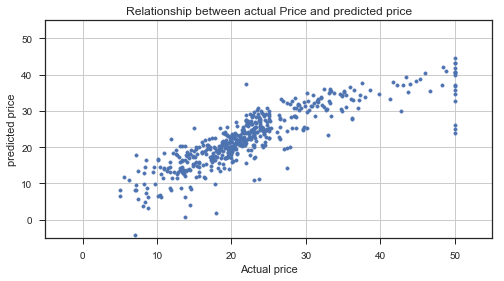

In [386]:
plt.scatter(bos.PRICE, lm.predict(X), marker='.')
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Relationship between actual Price and predicted price")
plt.xlim(-5, 55)
plt.ylim(-5, 55)
plt.grid(True)
plt.show()


In [393]:
r_sqr = lm.score(X, bos.PRICE)
print('R square value is:', r_sqr)

R square value is: 0.7406077428649428


### Discussion
The coefficient of determination is fairly high (0.74). However there are couple of outlier points. After getting rid of them the model would be improved.

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>

### Answer
Scikit-learn offers a lot of simple, easy to learn algorithms that mostly require the data to be organized properly before engaging to a linear model.

The syntax in StatsModels is close to R. So, for those who are transitioning to Python, StatsModels is a good choice. Also it offers statistics tools that are top of the line and validated against other statistics software like Stata and R
But it needs more understanding of the variables and statistics relative to scikit-learn models. 

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [172]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149873


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [173]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

8.690566310635247e-23


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>


In [395]:
# your turn
lm = LinearRegression()
X = bos.PTRATIO.values
y = bos.PRICE.values
X = X.reshape(-1, 1)
y = y.reshape(-1,1)
lm.fit(X, y)
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
print('Estimated coefficients: {}'.format(lm.coef_))

Estimated intercept coefficient: [62.34462747]
Estimated coefficients: [[-2.1571753]]


### Discussion
Here house price is function of only the pupil-teacher-ratio (PTRATIO). The estimated coefficient -2.157 suggestes that with 1 unit increase in PTRATIO, the price would go down 2.157 times. The intercept is 62.34, which is where the fitted line cross the y axis (i.e., x=0). This indicates when the PTARATIO is '0', the price would be ~ 62.34 units (possibly $62340). And as the PTRATIO gradually increase the price would drop.

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

In [210]:
# The coefficient of determination calculation
#ESS
ess = np.sum((lm.predict(X) - np.mean(y))**2)
# RSS
rss = np.sum((y - lm.predict(X))**2)
# TSS
tss = ess + rss
R_2 = ess/tss
print('ESS:', ess, 'RSS', rss)
print('The coefficient of determination:', R_2)

ESS: 11014.282208052504 RSS 31702.013206967255
The coefficient of determination: 0.2578473180092227


In [190]:
# directly from score
lm.score(X, y)

0.257847318009223

### Discussion
The coefficient of determination describes the percentage of the variance in the response variable (house price here) that can be explained by the linear regression model. A lower value such as 0.26 here suggests that only 26% variance can be explained by the model: PTRATIO not a good feature for the predicting price using linear regression model.

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

The F value in regression is the result of a test where the null hypothesis is that all of the regression coefficients are equal to zero. In other words, the model has no predictive capability. The alternative hypothesis says that the model fits the data better than the intercept-only model. Basically, the f-test compares the model with zero predictor variables (the intercept only model), and decides whether the added coefficients improved the model. If we get a significant result, then whatever coefficients included in the model improved the model’s fit. The F value is the ratio of the mean regression sum of squares divided by the mean error sum of squares.  Its value will range from zero to an arbitrarily large number. The value of Prob(F) is the probability that the null hypothesis for the full model is true (i.e., that all of the regression coefficients are zero). To know if the regression F-Value is significant, we have to estimate F-statistic or the critical F-value. The F-statistic compares the joint effect of all the variables together. We can reject the null hypothesis if the p value is smaller than alpha (0.05).

In [396]:
# computing F-statistic
F = (R_2/(1-R_2))*(len(y)-1-1)
print('F-statistic is:', F)

F-statistic is: 735.590621117021


In [398]:
m = ols('PRICE ~ PTRATIO',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 24 Mar 2019   Prob (F-statistic):           1.61e-34
Time:                        18:25:30   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

### Discussion
The F critical value or F-statistic is 175.1. The probability of F-statistic is 1.61E-34, which is the probability that the null hypothesis for the full model is true (i.e., that all of the regression coefficients are zero). This is infact a very low probability. The p-value (under P>|t|) is also small, basically zero. This means we can reject the null hypothesis, suggesting PTRATIO is a statisticall significant predictor of PRICE.

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>


### Discussion
The t statistic is the coefficient divided by its standard error. The standard error is an estimate of the standard deviation of the coefficient, the amount it varies across cases. It can be thought of as a measure of the precision with which the regression coefficient is measured. If a coefficient is large compared to its standard error, then it is probably different from 0.

We found that the F-statistic (175.1) is square of t-statistic (13.233). 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

In [400]:
# your turn
# fitting linear regression model with 'CRIM', 'RM', and 'PTRATIO'
lm = LinearRegression()
X = pd.concat([bos.CRIM, bos.RM, bos.PTRATIO], axis=1)
lm.fit(X, bos.PRICE)
R_2 = lm.score(X, y)
rss3 = np.sum((y - lm.predict(X))**2)
print('Coefficient of determination:', R_2)
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
print('Estimated coefficients: {}'.format(lm.coef_))
print('Sum of square:', rss3)

Coefficient of determination: 0.5934141551136979
Estimated intercept coefficient: -3.3066171324064797
Estimated coefficients: [-0.20210971  7.3815667  -1.0741868 ]
Sum of square: 34440763.38276529


In [217]:
# extract F-statistic
m = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Thu, 21 Mar 2019   Prob (F-statistic):           1.09e-97
Time:                        16:29:40   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

### Discussion
The F-statistic is 244.2 and the probability of F-statistic is very low, only 1.09E-97. It suggests that model performance has been improved by including the variable coefficients instead of intercept only model. 

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

### Answer
The coefficient of determination or R^2 is 0.593, meaning 59% of the variance in the house price can be described by this linear regression model.

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>

### Answer
Estimated coefficients for CRIM, RM and PTRATIO are -0.20210971, 7.3815667, and -1.0741868, respectively. Among these three, RM has largest influence on the house price, increasing 7.38 units of price for each unit change. CRIM has lowest influence as it decrease the price by only 0.2 units with increase in each unit. PTRATIO is relatively mor eimportant than CRIM as it decrease the price by 1.07 unit for increase in each unit.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [218]:
m = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     267.8
Date:                Thu, 21 Mar 2019   Prob (F-statistic):          6.39e-123
Time:                        17:17:40   Log-Likelihood:                -1550.9
No. Observations:                 506   AIC:                             3112.
Df Residuals:                     501   BIC:                             3133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9939      3.973      4.277      0.0

In [401]:
lm = LinearRegression()
X = pd.concat([bos.CRIM, bos.RM, bos.PTRATIO, bos.LSTAT], axis=1)
lm.fit(X, bos.PRICE)
R_2 = lm.score(X, y)
rss4 = np.sum((y - lm.predict(X))**2)
print(R_2)
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
print('Estimated coefficients: {}'.format(lm.coef_))
print('Sum of square:', rss4)

0.6813774833376793
Estimated intercept coefficient: 16.99388123327729
Estimated coefficients: [-0.06398628  4.61259822 -0.89092187 -0.53561563]
Sum of square: 36342041.94490187


In [402]:
# estimate F-statistics for comparing models
# DF4, rss4, for model with LSTAT
# DF3, rss3 for model without LSTAT
DF3 = 506 - 3 - 1
DF4 = 506 - 4 -1
F = ((rss3 - rss4)/(DF3 - DF4))/(rss4/DF4)
print('F-statistics for comparing model:', F)

F-statistics for comparing model: -26.21043036256934


### Discussion
With CRIM, RM, and PTRATIO AIC is 3233, and F-statistic is 244.2.

With CRIM, RM, PTRATIO, and LSTAT AIC is 3112, and F-statistic is 267.8.

A lower value of AIC, higher value of F-statistic and large F-statistic value in comparing model (-26.21) suggest that the model is improved by adding LSTAT.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [403]:
# Your turn.
# model from part 3
m = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Sun, 24 Mar 2019   Prob (F-statistic):           1.09e-97
Time:                        19:47:47   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

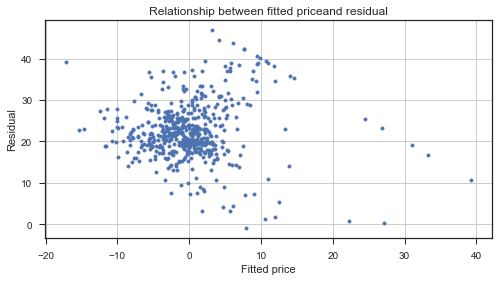

In [405]:
residual = bos.PRICE - m.fittedvalues
plt.scatter(residual, m.fittedvalues, marker='.')
plt.xlabel("Fitted price")
plt.ylabel("Residual")
plt.title("Relationship between fitted priceand residual")
#plt.xlim(-5, 55)
#plt.ylim(-5, 55)
plt.grid(True)
plt.show()


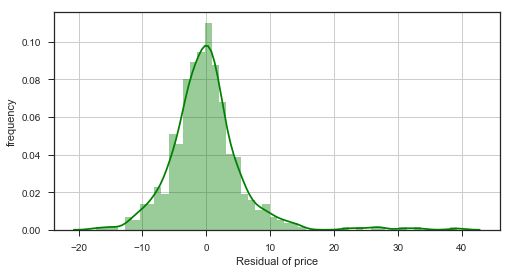

In [406]:
ax = sns.distplot(residual, bins=50, color="g")
ax.set_xlabel('Residual of price')
ax.set_ylabel('frequency')
ax.grid(True)
plt.show()

In [407]:
print(np.corrcoef(bos['CRIM'].values, bos['PRICE'].values))
print(np.corrcoef(bos['RM'].values, bos['PRICE'].values))
print(np.corrcoef(bos['PTRATIO'].values, bos['PRICE'].values))

[[ 1.         -0.38583169]
 [-0.38583169  1.        ]]
[[1.         0.69535995]
 [0.69535995 1.        ]]
[[ 1.         -0.50778669]
 [-0.50778669  1.        ]]


In [247]:
df = pd.concat([bos.CRIM, bos.RM, bos.PTRATIO, bos.PRICE], axis=1)
corrcoef = df.corr()
corrcoef.PRICE

CRIM      -0.385832
RM         0.695360
PTRATIO   -0.507787
PRICE      1.000000
Name: PRICE, dtype: float64

### Answer
The fitted value vs. residual plot shows that some points lies on a line. Apart from that other points seems to be raondomly distributed. The frequency distribution of the residual reflects the same: a normal distribution with a longer rightward tail. The correlation coefficient was lowest as -0.38 for the CRIM. The scatterplot between the two shows that some points are insensitive to the CRIM; a range from low to high house price with low CRIM. This actually caused that tail in the residual frequency plot. Overall, CRIM is a weak predictor for house price. The linearity assumption is somewhat violated with inclusion of it in the model. 

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

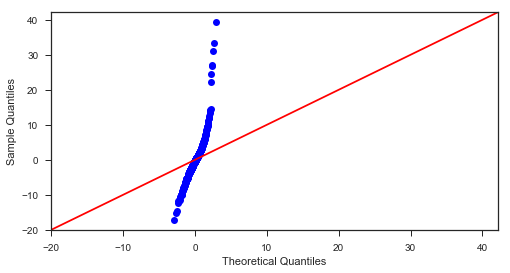

In [410]:
## constructing quantile plot or qqplot
resid_arr = array(residual)
sm.qqplot(resid_arr, line='45')
pylab.show()

### Discussion
The qq plot compares the distribution of the residual and a normal distribution (45 degree line). If the residual points lie on the 45 degree line then the distribution becomes a perfect normal distributon. From this qq plot it is clear that the slope of the residual is steeper than the normal distribution, suggesting the residual with larger dispersion. Also the arc in the plot suggests there is a heavy tail in the residual distribution, which is also evident from the histogram.  

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>


### Answer
From the fitted vs. residual plot it is easy to find which points are outlier, but it does not describe how much it deviates from the normality. The quantile plots does not offer any visual on the outliers, but it describes the deviation of a distribution from the normal distribution.

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>


Text(0,0.5,'Fitted price')

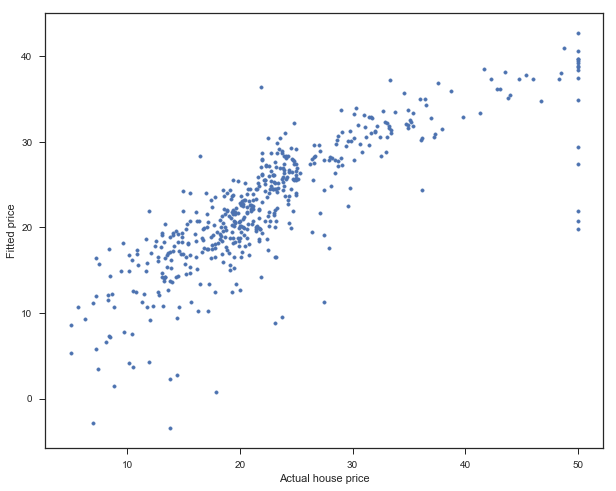

In [305]:
# Improved model
m = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT', bos).fit()
plt.scatter(bos.PRICE, m.fittedvalues, marker='.')
plt.xlabel('Actual house price')
plt.ylabel('Fitted price')

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>


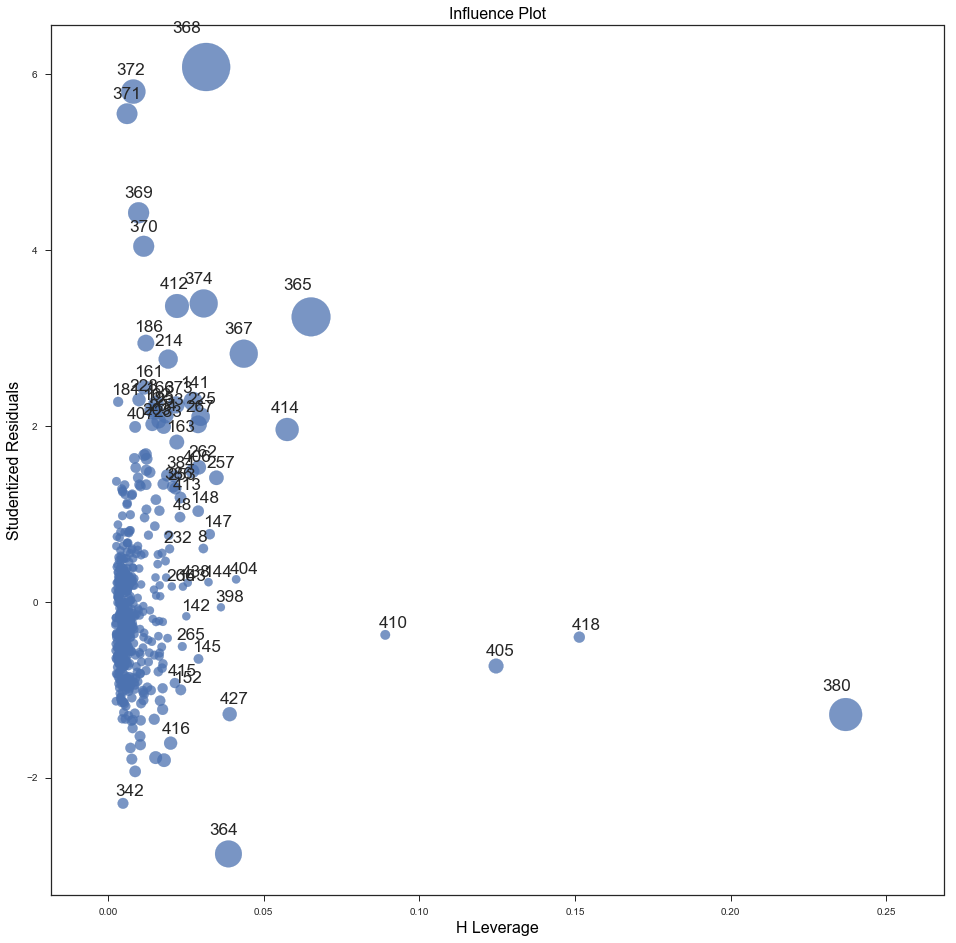

In [306]:
# Influence plots
fig, ax = plt.subplots(figsize=(16,16))
fig = sm.graphics.influence_plot(m, ax=ax, criterion="cooks")

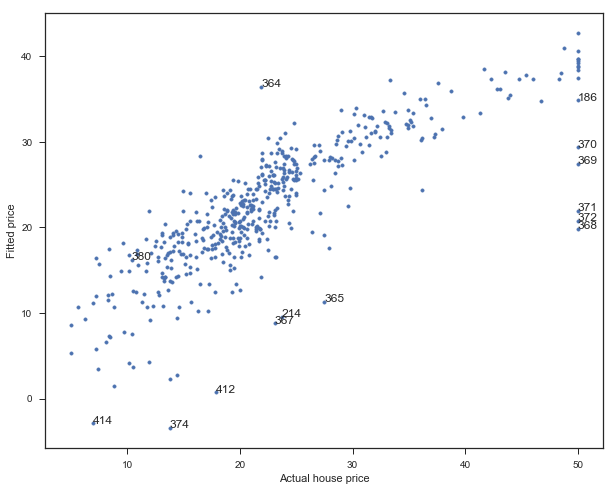

In [307]:
plt.scatter(bos.PRICE, m.fittedvalues, marker='.')
plt.xlabel('Actual house price')
plt.ylabel('Fitted price')
n = [186, 214, 364, 365, 367, 368, 369, 370, 371, 372, 374, 380, 412, 414]
for i in n:
    plt.annotate(i, (bos.PRICE[i], m.fittedvalues[i]))
plt.rcParams["figure.figsize"] = [10,8]
plt.show()

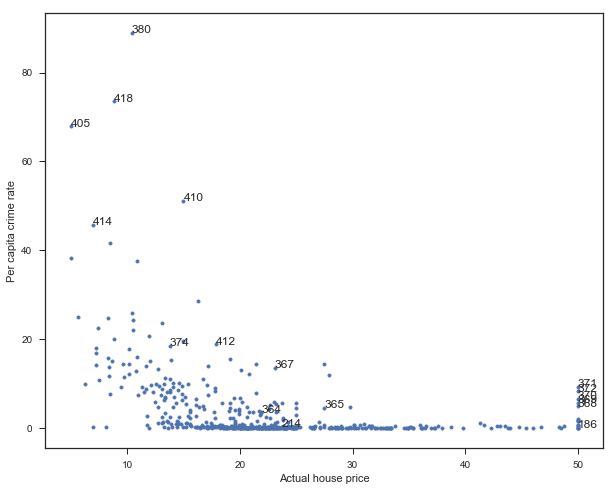

In [308]:
plt.scatter(bos.PRICE, bos.CRIM, marker='.')
plt.xlabel('Actual house price')
plt.ylabel('Per capita crime rate')
n = [186, 214, 364, 365, 367, 368, 369, 370, 371, 372, 374, 380, 405, 410, 412, 414, 418]
for i in n:
    plt.annotate(i, (bos.PRICE[i], bos.CRIM[i]))
plt.rcParams["figure.figsize"] = [10,8]
plt.show()

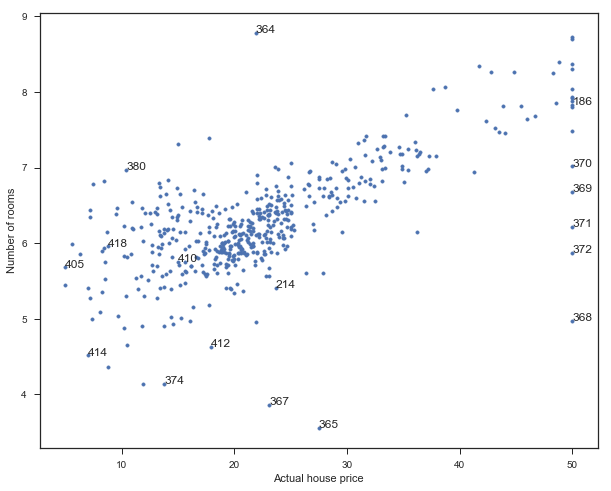

In [309]:
plt.scatter(bos.PRICE, bos.RM, marker='.')
plt.xlabel('Actual house price')
plt.ylabel('Number of rooms')
n = [186, 214, 364, 365, 367, 368, 369, 370, 371, 372, 374, 380, 405, 410, 412, 414, 418]
for i in n:
    plt.annotate(i, (bos.PRICE[i], bos.RM[i]))
plt.rcParams["figure.figsize"] = [10,8]
plt.show()

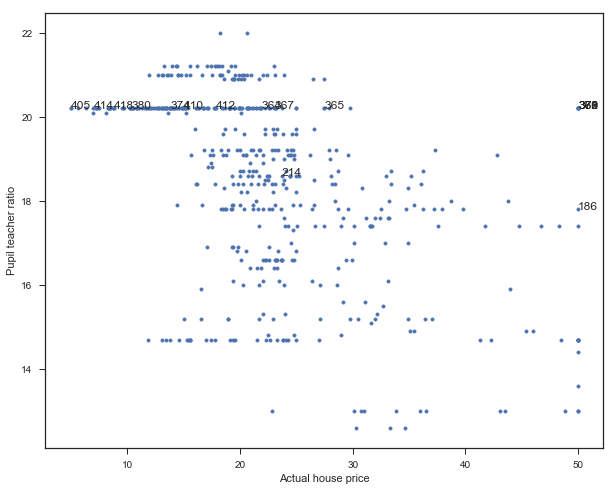

In [310]:
plt.scatter(bos.PRICE, bos.PTRATIO, marker='.')
plt.xlabel('Actual house price')
plt.ylabel('Pupil teacher ratio')
n = [186, 214, 364, 365, 367, 368, 369, 370, 371, 372, 374, 380, 405, 410, 412, 414, 418]
for i in n:
    plt.annotate(i, (bos.PRICE[i], bos.PTRATIO[i]))
plt.rcParams["figure.figsize"] = [10,8]
plt.show()

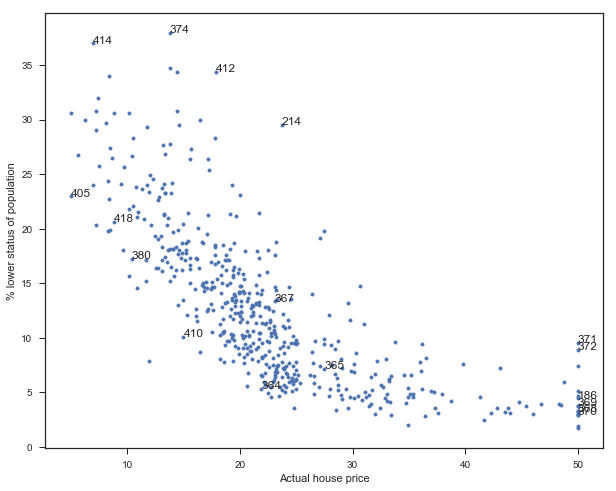

In [312]:
plt.scatter(bos.PRICE, bos.LSTAT, marker='.')
plt.xlabel('Actual house price')
plt.ylabel('% lower status of population')
n = [186, 214, 364, 365, 367, 368, 369, 370, 371, 372, 374, 380, 405, 410, 412, 414, 418]
for i in n:
    plt.annotate(i, (bos.PRICE[i], bos.LSTAT[i]))
plt.rcParams["figure.figsize"] = [10,8]
plt.show()

### Discussion
High leverage points are 380, 405, 410, 418. But not all of them have large influnce on the model, because 405, 410 and 418 don't have high studentized residuals. Overall high influence points are: 186, 214, 364, 365, 367, 369, 370, 371, 372, 374, 380, 412, and 414.

As is clear from the above scatter plots, almost all the outliers have same PTRATIO. Some outliers have exorbitantly high price (368, 369, 370, 371, 372, 186) irrespective of number of rooms or pupil teacher ratio. Some outliers have very high crume rate (380, 405, 410, 414, 418).

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>


In [300]:
type(bos)

pandas.core.frame.DataFrame

Text(0,0.5,'Fitted price')

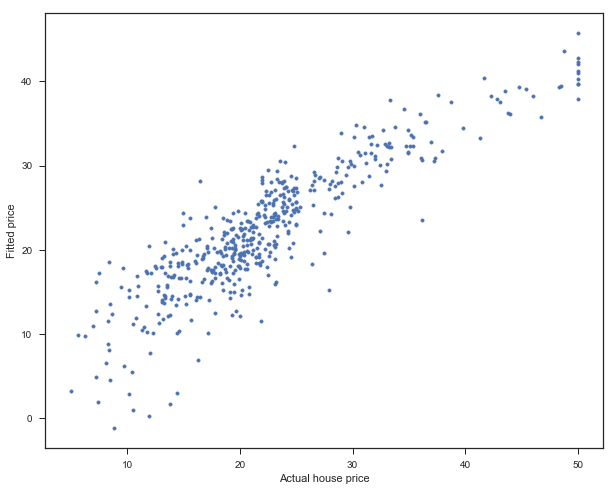

In [317]:
#df.drop(df.index[2])
bos_n = bos.drop(bos.index[n])
m_n = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT', bos_n).fit()
plt.scatter(bos_n.PRICE, m_n.fittedvalues, marker='.')
plt.xlabel('Actual house price')
plt.ylabel('Fitted price')

In [318]:
print(m_n.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     454.6
Date:                Sun, 24 Mar 2019   Prob (F-statistic):          2.35e-162
Time:                        13:01:31   Log-Likelihood:                -1371.0
No. Observations:                 489   AIC:                             2752.
Df Residuals:                     484   BIC:                             2773.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5640      3.320      1.676      0.0

In [319]:
m = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     267.8
Date:                Sun, 24 Mar 2019   Prob (F-statistic):          6.39e-123
Time:                        13:05:09   Log-Likelihood:                -1550.9
No. Observations:                 506   AIC:                             3112.
Df Residuals:                     501   BIC:                             3133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9939      3.973      4.277      0.0

### Discussion
Comparison between the original model and the improved model after removing the outliers:

R^2 improved from 0.68 to 0.79.
F-statistic improved from 267 to 454 (higher value is better).
AIC from 3112 to 2752 (lower value is better).
P>t from 0.038 to 0.001 for CRIM (lower value is better).
Skew from 1.837 to 0.522 (lower value is better)
Kurtosis from 9.638 to 3.675 (lower value is better).